# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [125]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [126]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [127]:
df.shape

(294478, 5)

<font color='red'>There are 294478 rows in the dataset </font>

In [129]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

**c.** The number of unique users in the dataset.

In [130]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

<font color='red'>There are 290584 unique users in the dataset \
It appears that some users may have taken part in the experiment twice, giving different time stamps</font>

**d.** The proportion of users converted.

In [132]:
df.query('converted == 1')['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

<font color='red'>Approximately 12% of the users show as converted</font>

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [134]:
df.groupby(['group', 'landing_page'], as_index=False).count()

,group,landing_page,user_id,timestamp,converted
0,control,new_page,1928,1928,1928
1,control,old_page,145274,145274,145274
2,treatment,new_page,145311,145311,145311
3,treatment,old_page,1965,1965,1965


<font color='red'>The number of times when 'group' is 'treatment' and the 'landing_page' is not a 'new_page' at the same time (so must be 'old_page'), is 1965</font>


**f.** Do any of the rows have missing values?

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<font color='red'>The results show that there are no missing value<font/>

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [138]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

df2 = df.drop(df.query('group == "treatment" & landing_page != "new_page" | group == "control" & landing_page != "old_page"').index)

In [139]:
# Verify that it worked using groupby

df2.groupby(['group', 'landing_page'], as_index=False).count()

,group,landing_page,user_id,timestamp,converted
0,control,old_page,145274,145274,145274
1,treatment,new_page,145311,145311,145311


In [140]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<font color='red'> All innacurate rows have been removed. The new dataframe is df2.\
    The number of observations in the control group that received 'old_page' is now 145274.\
    The number of observations in the treatment that received 'new_page' is now 145311.<font/>

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [141]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

<font color='red'>There are 290584 unique users in df2<font/>

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [143]:
dfdup = df2[df2.duplicated('user_id')]
dfdup.head()

#source: https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [144]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [145]:
# Remove one of the rows with a duplicate user_id...
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

df2 = df2.drop_duplicates(subset='user_id', keep="first")

# source: https://www.interviewqs.com/ddi-code-snippets/drop-duplicate-rows-pandas

In [187]:
# Check again if the row with a duplicate user_id is deleted or not
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

<font color='red'>One duplicate row has been removed. \
    The operation appears successful as we now have matching unique values for 'user_id' and 'timestamp'.<font/>

### ToDo 1.4  
**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [189]:
# proportion of users who converted in the Ppopulation
# The overall converted success rate in the Ppopulation
prop_conv = df2.converted.mean()
prop_conv

0.11959708724499628

In [190]:
# proportion of users who didn't convert in the Ppopulation
prop_nconv = 1 - df2.converted.mean()
prop_nconv

0.8804029127550037

In [150]:
#save df2
df2.to_csv('ab_data_df2.csv', index=False)

<font color='red'> The probability of an individual in the overall population converting regardless of which page they receive is 12%. This is the overall converted success rate.<font/>

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [151]:
#create two dataframes separating control and treatment groups
df_c = df2[df2['group'] == 'control']
df_t = df2[df2['group'] == 'treatment']

In [152]:
#check that it worked
df_c.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [191]:
#proportion of users in control group who converted
df_c.converted.mean()

0.1203863045004612

<font color='red'> The probability of an individual in the control group when seeing the old_page converting is 12%. <font/>

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [193]:
#proportion of users in treatment group who converted
df_t.converted.mean()

0.11880806551510564

<font color='red'> The probability of an individual in the treatment group when seeing the new_page converting is 11.8%. <font/>

In [213]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff= df_t.converted.mean() - df_c.converted.mean()
obs_diff

-0.0015782389853555567

<font color='red'> The difference in the conversion rate between the control group and the treatment group (therefore the old_page and the new_page) is -0.015%.  <font/>

In [158]:
# Save df_c and df_t 
df_c.to_csv('ab_data_df_c.csv', index=False)
df_t.to_csv('ab_data_df_t.csv', index=False)

**d.** What is the probability that an individual received the new page?

In [159]:
new_pageP = (df2['landing_page'] == "new_page").mean()
new_pageP

0.5000619442226688

<font color='red'> The probability of an individual receiving the new_page is 50%. <font/>

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<font color='red'> Given that the difference between the probability of conversion if a user was from the control or treatment group resulted in -0.015%, I do not believe this difference is significant enough to conclude whether the new treatment group leads to more conversions. <font/>

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<font color='red'> H0 = p_new - p_old =< 0  
H1 = p_new - p_old > 0 <font/>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [160]:
p_new = prop_conv
print(p_new)

0.11959708724499628


<font color='red'> The converstion rate for p_new under the null hypothesis is 11.9%. <font/>


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [161]:
p_old = prop_conv
print(p_old)

0.11959708724499628


<font color='red'> The converstion rate for p_old under the null hypothesis is also 11.9%, given that in the null hypothesis we assume p_new and p_old to be equal to the converted success rate of our population. <font/>

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [162]:
n_new = 145311
print(n_new)

145311


<font color='red'> The number of individuals in the treatment group is 145311 = n_new. <font/>

**d.** What is $n_{old}$, the number of individuals in the control group?

In [163]:
n_old = 145274
print(n_old)

145274


<font color='red'> The number of individuals in the control group is 145274 = n_old. <font/>

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [198]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])
new_page_converted.mean()

# NB putting 1-p_new before p_new means the difference between converted and not converted

0.12017672440489709

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [197]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
old_page_converted.mean()

0.11925051970758704

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [199]:
obs_diff_sample = new_page_converted.mean() - old_page_converted.mean()
obs_diff_sample

0.000926204697310043

<font color='red'> The difference in the conversion rate between the simulated sample of the treatment group and the simulated sample of the control group is 0.009%. <font/>


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [216]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted2 = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])
    old_page_converted2 = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted2.mean() - old_page_converted2.mean())

In [217]:
# convert to numpy array 
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

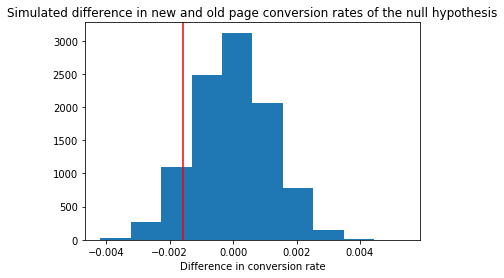

In [220]:
plt.hist(p_diffs); 
plt.title('Simulated difference in new and old page conversion rates of the null hypothesis')
plt.xlabel('Difference in conversion rate')
plt.axvline(obs_diff, color='r');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [219]:
(p_diffs > obs_diff).mean()

0.905

<font color='red'> 90% of the p_diffs are greater than the difference in conversion rate between the treatment and control groups (and therefore new_page and old_page) of the Ppopulation <font/>

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

<font color='red'>The result of the previous computation is referred to as a P-value: the probability of observing your statistic if the null hypothesis is true. 
    
Our null hypothesis is that the difference in conversion rates between the new and old page is less than or equal to 0 and the P-value is the proportion of simulated results that are larger than our sample mean.


As our P-value is 0.9 and greater than our Type 1 error rate is 0.05, it suggests that our results are statistically insignificant.

There is not sufficient evidence to say that the new_page has a higher conversion rate than the old_page.</font>




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [221]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old =  df2.query('group == "control" & converted == 1')['converted'].count()

# number of conversions with the new_page
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145311)

<font color='red'>
    
`convert_old`: number of conversions with the old_page = 17489
    
`convert_new`: number of conversions with the new_page = 17624

`n_old`: number of individuals who were shown the old_page = 145274

`n_new`: number of individuals who were shown the new_page = 145311 <font/>

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [225]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.905173705140591)

In [227]:
from scipy.stats import norm
norm.ppf(.95)
# This tells us the critical value of our 95% confidence interval
# source: https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa

1.6448536269514722

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

<font color='red'> The P-value calculated in the previous step is 0.9; almost identical to the P-value calculated by the bootstrapping approach. 
    
The value of the z-score tells you how many standard deviations your results are away from the mean. A negative z-score means that the score is below the mean average.

    
We are looking for a z-score of 1.644 or above to reject the null hypothesis; this would mean that the result fell outside of the 95% confidence interval . As such, with a z-score of -1.311 we cannot reject the null hypothesis.<font/>

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color='red'> Logistic regression <font/>

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [232]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

In [233]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [236]:
# Rename the column from 'treatment'to 'ab_page'

df2.rename(columns = {'treatment':'ab_page'}, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [240]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

# We dropped the new column 'control'to make sure the matrices is full rank

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [241]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:               8.077e-06
Time:                        01:05:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


<font color='red'> The hypotheses for the logistic regression model are:
    
 H0 = p_new - p_old = 0
 
 H1 = p_new - p_old ≠ 0
 
 because we are considering a variable with a binary output.
    
In our previous method, the null hypothesis was equal to or less than 0 and that the alternative was greater than 0.

In this case, the alternative can be greater or lesser than 0, meaning it is a two sided model.

The P-value in the logistic model was returned as 0.19, which differs greatly from the P-value of 0.9 in the previous methods. However, it is still greater than the 0.05 type 1 error rate, which means that we still cannot reject the null hypothesis.<font/>

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color='red'> The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. It is likely that other factors influence the conversion rate and therefore exploring their relationship to the outcome is a good idea, to avoid assuming incorrectly that the relationship is binary. A disadvantage of adding other variables to the analysis is that a relationship between the two predicting variables could obscure the correlation to the response variable.<font/> 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns.  

 Provide the statistical output as well as a written response to answer this question.

In [244]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [245]:
# Join with the df2 dataframe
df_merged = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [246]:
# What are the possible entries to the column 'country'
df_merged.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [247]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

In [248]:
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [252]:
# Fit your model, and summarize the results
df_merged['intercept'] = 1
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:               2.323e-05
Time:                        01:46:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

<font color='red'> The P-values of 'ab_page', 'UK' and 'US' are all above 0.05, which suggests again that there is not statistically significant information to reject the null hypothesis. It also suggests that there is no influence on the conversion rate of which country a user is in when they receive the new_page. <font/>

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [256]:
# Create additional columns
df_merged['us_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['uk_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control,CA,UK,US,us_page,uk_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1


In [257]:
# Fit your model, and summarize the results
df_merged['intercept'] = 1
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'uk_page', 'us_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:               3.482e-05
Time:                        02:01:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
us_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

<font color='red'> The P-values for all variables are higher than 0.05. Therefore we can say that relationships between page and country have no significant effects on conversion.<font/>

<a id='finalcheck'></a>
## Conclusion


<font color='red'> After cleaning the data and splitting it into groups based on who received the old page and the new page, I observed a -0.015% difference in probability between the two groups. The groups produced such similar results, that at this stage there was not significant data to suggest that the new page lead to more conversions.
    
In order to investigate further, I performed bootstrap sampling and simulated 10,000 instances; 90% were found to have a bigger delta between the control and treatment group results. As our P-value here is 0.9 and greater than our Type 1 error rate is 0.05, it suggests that our results are still statistically insignificant.
    
Upon performing a two-sample Z test, the p-value found was almost identical to the 0.9 found with the bootstrapping method. I was looking for a z score of over 1.644, which would mean that the result fell outside of the 95% confidence interval. As I calculated a z score of -1.311, I cannot reject the null hypothesis.
    
As a final test, I fitted a logic regression model using statsmodels, to see how the p vaule differed when considering a binary output. The p-value was in fact different from the 0.9 in previous steps, but at 0.19 it was still not greater than the 0.05 required type 1 error rate.

In summary, after performing 3 types of ab testing, there is not sufficient evidence to say that the new_page has a higher conversion rate than the old_page, therefore I would advise the company to maintain the old page until they conduct a bigger test and collect more data. A bigger dataset may yeild different results. I would also suggest that a bigger data set would include more variety in other factors such as country, which was tested in the final step, which may have an impact on the conversion rate. I would also investigate the relationship of those factors to each other, in case of multicollinearity. <font/>